In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

sns.set()

In [4]:
# SPY 가격 데이터 다운로드
etf = yf.Ticker('SPY')
data = etf.history(start='2000-01-01', actions=False)

# 거래량 데이터 제거
data.drop(['Volume'], inplace=True, axis=1)

data

,Open,High,Low,Close
Date,,,,
2000-01-03 00:00:00-05:00,97.151924,97.151924,94.284877,95.308823
2000-01-04 00:00:00-05:00,94.059589,94.407730,91.509966,91.581642
2000-01-05 00:00:00-05:00,91.704480,92.748903,89.943295,91.745438
2000-01-06 00:00:00-05:00,91.499722,92.728456,90.270988,90.270988
2000-01-07 00:00:00-05:00,91.950267,95.513596,91.786436,95.513596
...,...,...,...,...
2023-02-15 00:00:00-05:00,410.350006,414.059998,409.470001,413.980011
2023-02-16 00:00:00-05:00,408.790009,412.910004,408.140015,408.279999
2023-02-17 00:00:00-05:00,406.059998,407.510010,404.049988,407.260010


In [5]:
# 파라미터
param = 20

### Parkinson (1980) 변동성 추정

In [6]:
# Parkinson 변동성 계산
# np.sqrt(252) -> 연율화
vol_p = np.sqrt(252 / (4 * param * np.log(2)) * pd.DataFrame.rolling(np.log(data['High'] / data['Low']) ** 2, 20).sum())

Text(0.5, 1.0, 'Parkinson Volatility')

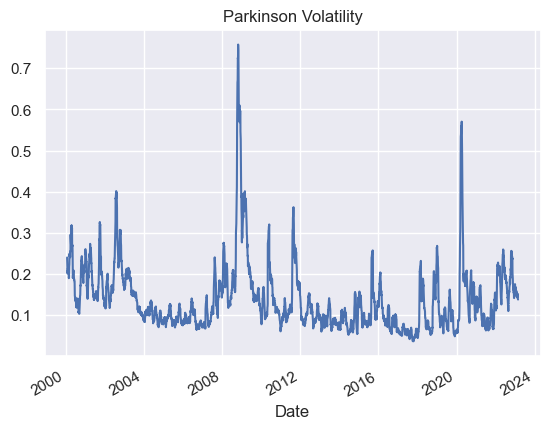

In [7]:
# 결과 출력
vol_p.plot()
plt.title('Parkinson Volatility')

### Garman-Klass (1980) 변동성 추정

In [8]:
# 첫번째 항
term1 = 0.5 * pd.DataFrame.rolling(np.log(data['High'] / data['Low']) ** 2, param).sum()

# 두번째 항
term2 = (2 * np.log(2) - 1) * pd.DataFrame.rolling(np.log(data['Close'] / data['Open']) ** 2, param).sum()

# Garman-Klass 변동성 계산
vol_gk = np.sqrt((252 / param) * (term1 - term2))

Text(0.5, 1.0, 'Garman-Class Volatility')

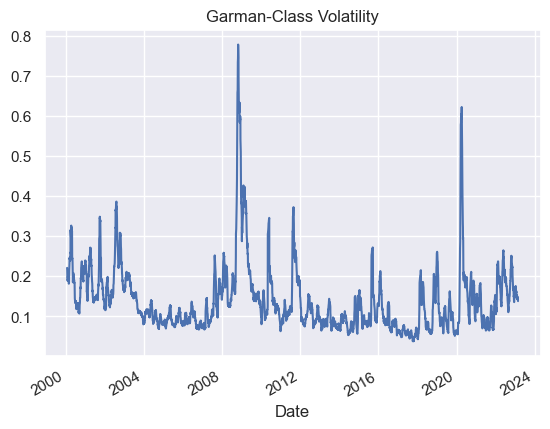

In [9]:
vol_gk.plot()
plt.title('Garman-Class Volatility')

### Rogers-Satchell (1991) 변동성 추정

In [10]:
# 첫번째 항
term1 = np.log(data['High'] / data['Close']) * np.log(data['High'] / data['Open']) + np.log(data['Low'] / data['Close']) * np.log(data['Low'] / data['Open'])

# Rogers-Satchell 변동성 계산
vol_rs = np.sqrt((252 / param) * pd.DataFrame.rolling(term1, param).sum())


Text(0.5, 1.0, 'Rogers-Satchell Volatility')

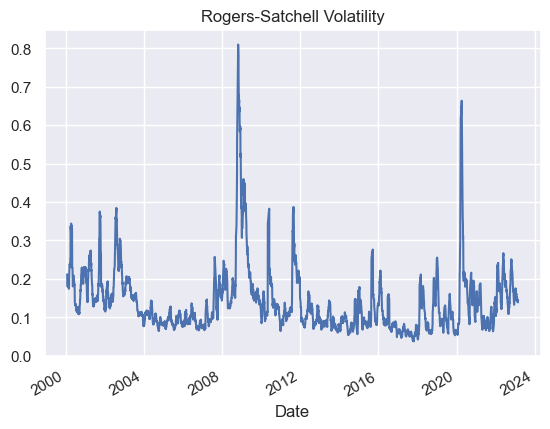

In [11]:
# 결과 출력
vol_rs.plot()
plt.title('Rogers-Satchell Volatility')

### Yang-Zhang (2000) 변동성 추정

In [13]:
# 파라미터
alpha = 1.34
kappa = (alpha - 1) / (alpha + ((param + 1) / (param - 1)))

# 오버나잇 변동성
# 오버나잇 변동성 구할 때 날짜가 달라지므로 shift 활용
vol_o = np.log(data['Open'] / data['Close'].shift())

# 장중 변동성
vol_c = np.log(data['Close'] / data['Open'])

# Yang-Zhang 변동성 계산
vol_yz = np.sqrt(vol_o ** 2 + kappa * vol_c ** 2 + (1 - kappa) * vol_rs ** 2)

Text(0.5, 1.0, 'Yang-Zhang Volatility')

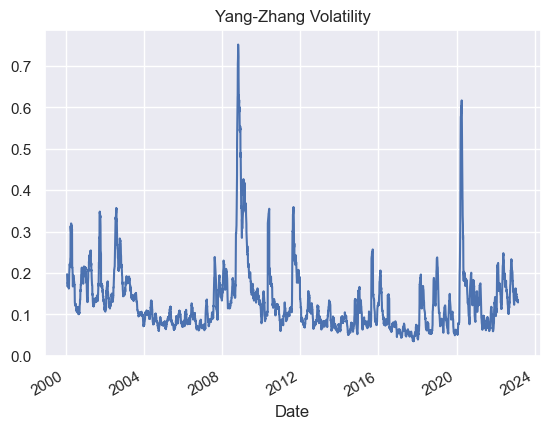

In [14]:
# 그래프 출력
vol_yz.plot()
plt.title('Yang-Zhang Volatility')

### 모델 비교

Text(0, 0.5, 'Volatility')

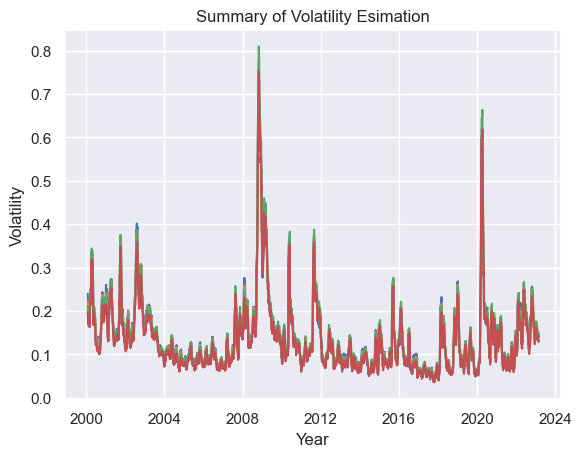

In [15]:
# 그래프 시각화 1
plt.plot(vol_p)
plt.plot(vol_gk)
plt.plot(vol_rs)
plt.plot(vol_yz)

plt.title('Summary of Volatility Esimation')
plt.xlabel('Year')
plt.ylabel('Volatility')

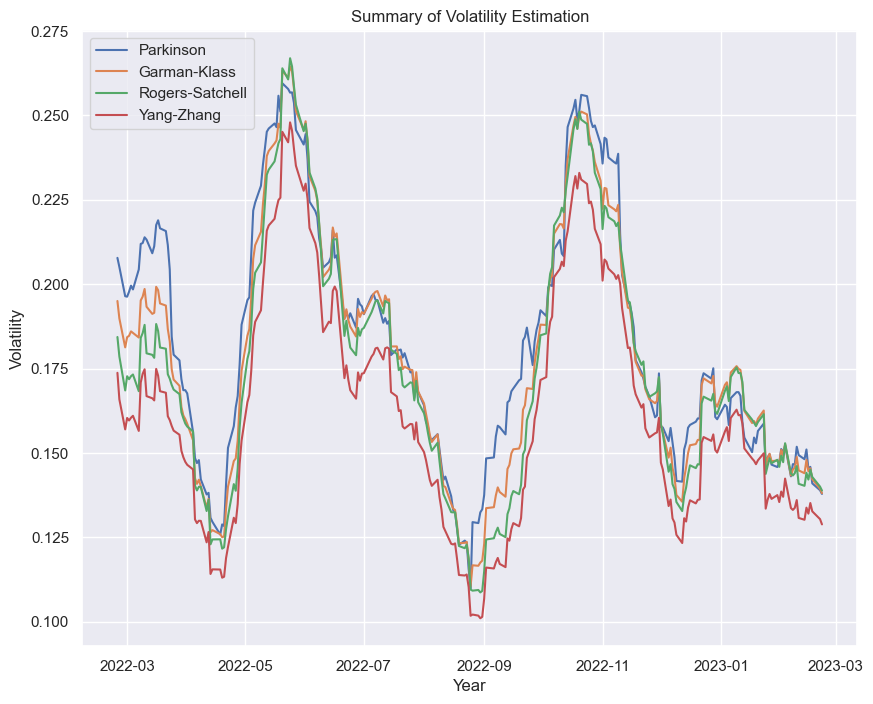

In [16]:
# 그래프 시각화 2 : 최근 1년
plt.figure(figsize=(10, 8))
plt.plot(vol_p.iloc[-250:], label='Parkinson')
plt.plot(vol_gk.iloc[-250:], label='Garman-Klass')
plt.plot(vol_rs.iloc[-250:], label='Rogers-Satchell')
plt.plot(vol_yz.iloc[-250:], label='Yang-Zhang')

plt.title('Summary of Volatility Estimation')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend(loc='upper left')